# Trabajo práctico 1. Fraude en tarjetas

Una plataforma de ventas online nos contrata para que realicemos un modelo que nos
permita detectar un posible fraude dada cierta operación para ello contamos con un dataset
que contiene las siguientes columnas:

● Step: representa una unidad de tiempo donde 1 step equivale a 1 hora

● type: tipo de transacción en línea

● amount: el importe de la transacción

● nameOrig: cliente que inicia la transacción

● oldbalanceOrg: saldo antes de la transacción

● newbalanceOrig: saldo después de la transacción

● nameDest: destinatario de la transacción

● oldbalanceDest: saldo inicial del destinatario antes de la transacción

● newbalanceDest: el nuevo saldo del destinatario después de la transacción

● isFraud: transacción fraudulenta

Utilizando los modelos de clasificación vistos hasta el momento generar un notebook que
permita de ser posible resolver el problema que nos está planteando el cliente.

IMPORTANTE
Sabemos que por cada transacción aprobada el porcentaje de ganancia es de un
20%, y por cada fraude aprobado se pierde el 100% del dinero de la transacción.
Realizar un análisis y determinar un modelo que permita maximizar la ganancia de la empresa.

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset


## 1. Obtención de datos

Para esta práctica vamos a usar el siguiente dataset

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [3]:
# Cambiar a lo que corresponda
DATASET_PATH = "..\\data\\datos_tp1"


In [4]:
!dir {DATASET_PATH}

 El volumen de la unidad D es DISCO 2 SSD
 El n�mero de serie del volumen es: 4870-0D70

 Directorio de d:\Users\juanp_schamun\Documents\GitRepositories\CEIA\aprendizaje_maquina_I\data\datos_tp1

18/04/2023  17:16    <DIR>          .
18/04/2023  17:16    <DIR>          ..
17/04/2022  15:36       493,534,783 PS_20174392719_1491204439457_log.csv
               1 archivos    493,534,783 bytes
               2 dirs  90,172,002,304 bytes libres


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Importamos librerias necesarias para validacion del modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve


# librerias de Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


## 2. Análisis exploratorio inicial

In [6]:
df = pd.read_csv(DATASET_PATH+"/PS_20174392719_1491204439457_log.csv")
# saco una muestra más chica para acelerar el proceso de pruebas
dfm = df.sample(100000)

In [7]:
dfm['isFraud'].value_counts(normalize=True)

0    0.99882
1    0.00118
Name: isFraud, dtype: float64

In [8]:
df['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

Obtener alguna información básica

In [9]:
dfm.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.711400,1.775166e+05,8.260631e+05,8.475861e+05,1.087962e+06,1.211637e+06,0.001180,0.0
std,142.561125,5.742571e+05,2.856020e+06,2.892624e+06,3.294113e+06,3.593817e+06,0.034331,0.0
min,1.000000,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.334412e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.506483e+04,1.360800e+04,0.000000e+00,1.306240e+05,2.138765e+05,0.000000,0.0
75%,336.000000,2.085704e+05,1.059166e+05,1.400201e+05,9.440019e+05,1.111589e+06,0.000000,0.0
max,743.000000,3.984097e+07,4.169084e+07,4.143236e+07,3.022754e+08,3.023230e+08,1.000000,0.0


In [10]:
dfm[['isFraud']].value_counts()


isFraud
0          99882
1            118
dtype: int64

In [11]:
dfm.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1371371,138,CASH_IN,135186.06,C556895964,29708.0,164894.06,C834032223,391176.39,255990.34,0,0
2701405,211,TRANSFER,63491.90,C477671422,0.0,0.00,C1940460902,1385152.42,1448644.32,0,0
2768146,213,PAYMENT,1510.26,C928000045,323227.0,321716.74,M1619600229,0.00,0.00,0,0
3712639,277,CASH_OUT,196139.18,C1305364987,0.0,0.00,C573475757,1727461.83,1923601.00,0,0
920764,43,PAYMENT,12340.66,C1694950589,0.0,0.00,M218347505,0.00,0.00,0,0


In [12]:
dfm.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6229794,592,CASH_OUT,164292.12,C1505878763,0.0,0.0,C729794428,1140525.48,1304817.61,0,0
1716219,160,PAYMENT,24197.19,C479602439,0.0,0.0,M1472949943,0.00,0.00,0,0
3001844,232,PAYMENT,6926.48,C310695097,0.0,0.0,M1850139443,0.00,0.00,0,0
4221194,306,CASH_OUT,38497.45,C408593826,687.0,0.0,C314099161,0.00,38497.45,0,0
4946558,351,CASH_OUT,265126.60,C2000648743,24277.0,0.0,C1258107066,138359.39,403486.00,0,0


In [13]:
# analizamos la variable nameDest

df['nameDest'].value_counts()

# No parece aportar mucha data en principio

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

## 3. Gráficos

In [14]:
dfm2=df.sample(5000)
dfm2['isFraud'].value_counts(normalize=True)

0    0.999
1    0.001
Name: isFraud, dtype: float64

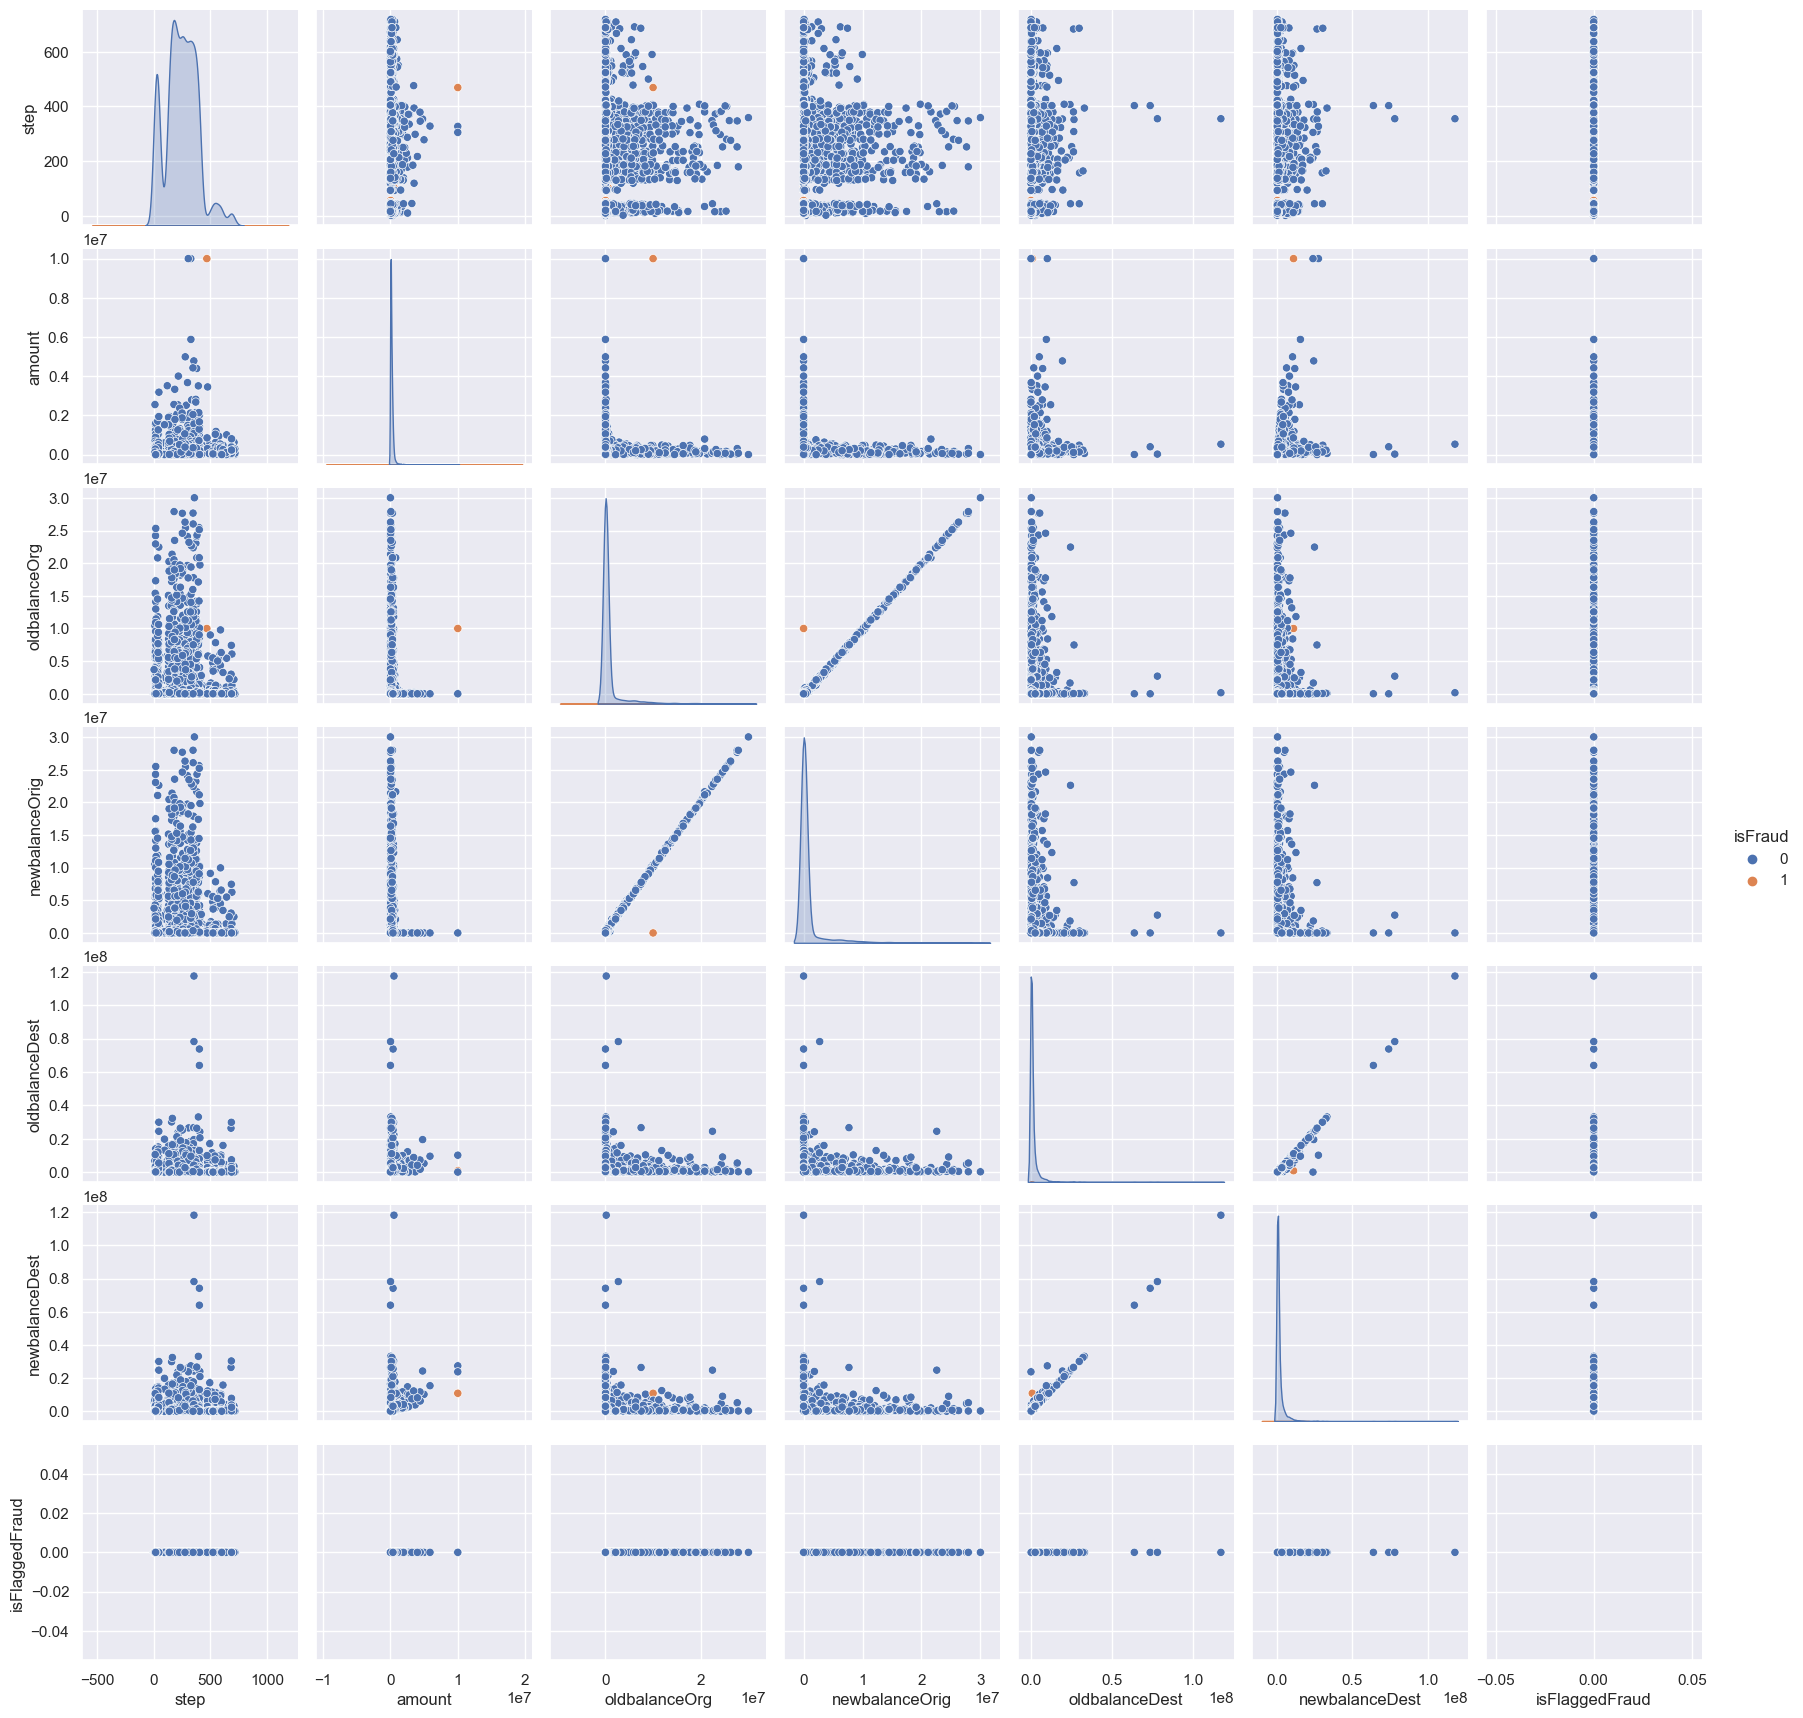

In [15]:
sns.pairplot(dfm2, hue='isFraud')

<Axes: xlabel='type', ylabel='Percent'>

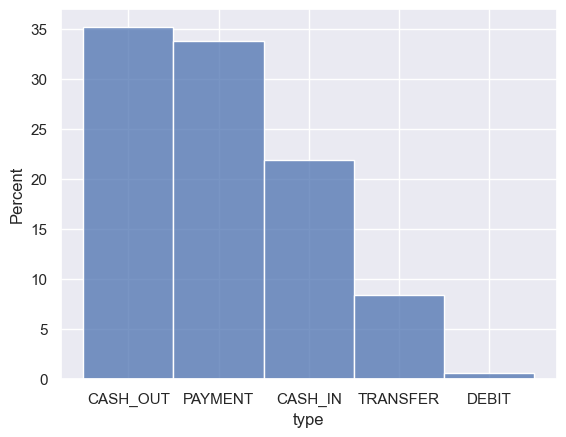

In [16]:
sns.histplot(data=dfm, x='type', stat="percent", discrete=True)

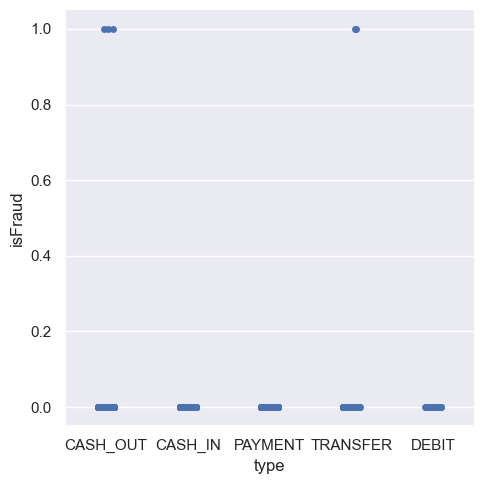

In [17]:
sns.catplot(data=dfm2, x="type", y="isFraud")

In [18]:
df[['isFraud', 'type']].value_counts(normalize=False)

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
dtype: int64

Se nota que solo hay Fraude en las transferencias y los retiros. Lo cual tiene sentido.
Analizaremos estos

In [19]:
# Nuevo DF solo con transferencias y retiros
dfToC = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

In [20]:
dfToC['isFraud'].value_counts(normalize=True)

0    0.997035
1    0.002965
Name: isFraud, dtype: float64

In [21]:
dfm['isFraud'].value_counts(normalize=True)

0    0.99882
1    0.00118
Name: isFraud, dtype: float64

## 4. Modelos

#### Baseline

In [21]:
# Sabemos que por cada transacción aprobada el porcentaje de ganancia es de un 20%
# y por cada fraude aprobado se pierde el 100% del dinero de la transacción.
# La idea maximizar la ganancia de la empresa.
# Por lo cual debemos tener en cuenta un Baseline acorde.
# Los Falsos Positivos cuestan un 20% de la transacción
# Los Falsos Negativos cuestan un 100% de la transacción
# Por lo tanto, nos interesa maximizar más que nada el Recall
# Sabemos también por los datos que la la cantidad de transacciones fraudulentas es muy baja con respecto al total
# Es decir, están muy desbalanceadas las clases
# Si no hicieramos nada, la empresa perdería un 100% de las operaciones fraudulentas.



In [22]:
# Calculo la cantidad de transacciones fraudulentas 
ratio_cant_fraude = df['isFraud'].value_counts(normalize=True)[1]
print('El porcentage en cantidad de transacciones fraudulentas sobre el total es de: {:.2%}'.format(ratio_cant_fraude))

El porcentage en cantidad de transacciones fraudulentas sobre el total es de: 0.13%


In [23]:
# Ahora calculo la media de los montos de cada clase
df.groupby(by='isFraud')['amount'].mean()


isFraud
0    1.781970e+05
1    1.467967e+06
Name: amount, dtype: float64

In [24]:
# Vemos que en la media, las operaciones Fraudulentas son de mayor monto que las no Fraudulentas en 1 orden de magnitud.

# Calculo ese porcentage respecto al valor de transaciones totales
ratio_amount_fraude = df.groupby(by='isFraud')['amount'].sum()[1] / df['amount'].sum()
print('El porcentage del valor de transacciones fraudulentas sobre el total es de: {:.2%}'.format(ratio_amount_fraude))

El porcentage del valor de transacciones fraudulentas sobre el total es de: 1.05%


In [25]:
df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].groupby(by='isFraud')['amount'].sum()

isFraud
0    8.676486e+11
1    1.205642e+10
Name: amount, dtype: float64

In [26]:
# Es decir, si no hicieramos nada, la empresa perdería el 1.05% del monto de las operaciones totales.
# Por otro lado, muy sencillamente se ve que sólo hay fraude en transferencias y retiros. Sobre este monto, el valor es mayor
# Calculo ese porcentage respecto al valor de transaciones solo transferencias y retiros
ratio_amount_fraude_ToC = df.groupby(by='isFraud')['amount'].sum()[1] / df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]['amount'].sum()
print('''El porcentage del valor de transacciones fraudulentas sobre el total 
correspondiente a transferencias y retiros es de: {:.2%}'''
          .format(ratio_amount_fraude_ToC))

El porcentage del valor de transacciones fraudulentas sobre el total 
correspondiente a transferencias y retiros es de: 1.37%


### Preparación

In [175]:
# Separamos Features de labels
# Utilizo un sample
X = df.iloc[:,:-2]
y = df['isFraud']
# Elimino nameOrig y nameDest ya que considero que no aportan y son categóricas, lo cual además me implica problemas
X.drop(['nameOrig','nameDest'], axis=1, inplace=True)

In [176]:
X['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [177]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [178]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [179]:
# Por ultimo debo encodear la variable categórica type para que funcione la implementacion

dummies = pd.get_dummies(X['type'], prefix='type_')
X = pd.concat([X,dummies], axis=1).drop(['type'], axis=1)
X
#ohe = OneHotEncoder
#ohe.fit_transform(X[['type']])
#transformed = ohe.fit_transform(X[['type']])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [180]:
# Genero sets de train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56, stratify=y)



In [168]:
# Utilizo undersampling de la clase mayoritaria para balancear las clases. Únicamente en los sets de training
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_train, y_train = undersample.fit_resample(X_train, y_train)

# Utilizo oversampling de la clase minoriaria para balancear las clases. Únicamente en los sets de training
#oversample = RandomOverSampler(sampling_strategy='auto')
#X_train, y_train = oversample.fit_resample(X_train, y_train)




Probé el modelo usando el undersampling y dio extremadamente mal. Precisión del 2%
Probándolo con Oversampling es similar. Precisión del 2%
Con lo cual me quedo sin balancear.

In [181]:
y_train.value_counts()

0    5083526
1       6570
Name: isFraud, dtype: int64

### DecisionTreeClassifier

#### Definición

In [182]:
# Modelo
model = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

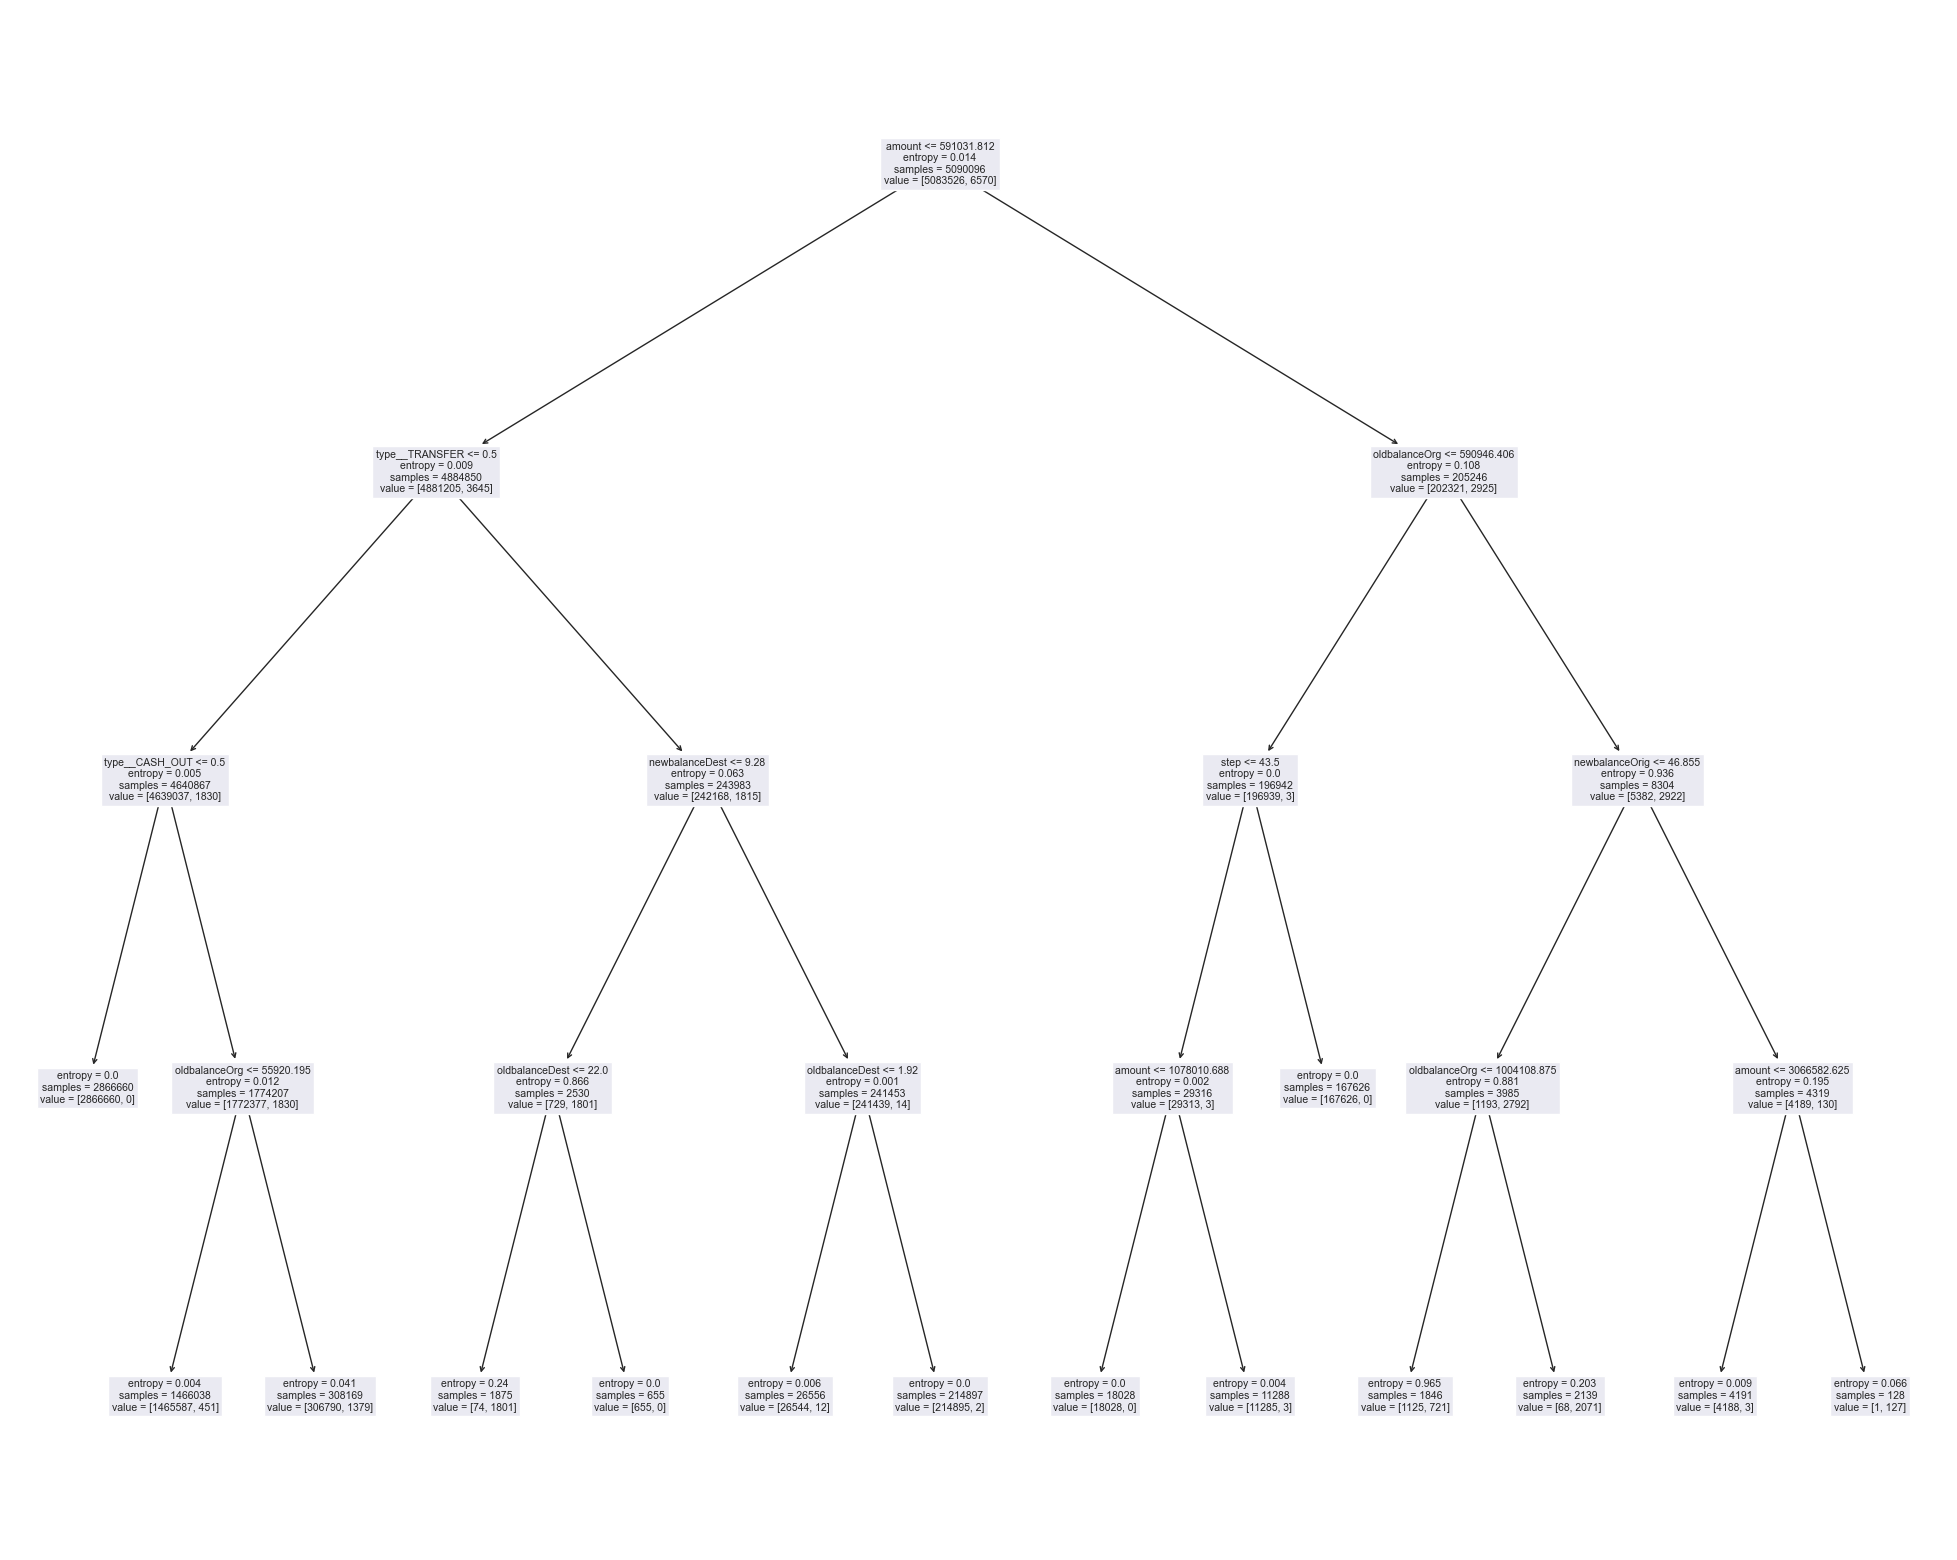

In [183]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=X.columns)

Importancia de las features

In [184]:
featuresImportance=pd.DataFrame(X.columns)
featuresImportance['Importance'] = model.feature_importances_
featuresImportance.sort_values(by='Importance', ascending=False)

,0,Importance
2,oldbalanceOrg,0.348173
5,newbalanceDest,0.255888
1,amount,0.158655
10,type__TRANSFER,0.085323
3,newbalanceOrig,0.067142
7,type__CASH_OUT,0.049859
4,oldbalanceDest,0.034798
0,step,0.000162
6,type__CASH_IN,0.000000
8,type__DEBIT,0.000000


#### Validacion

In [185]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [186]:
precTrain = precision_score(y_pred=y_pred_train, y_true=y_train)
precTest = precision_score(y_pred=y_pred_test, y_true=y_test)

print('Precission Train = {:.2%}'.format(precTrain))
print('Precission Test = {:.2%}'.format(precTest))

Precission Train = 96.55%
Precission Test = 96.62%


In [187]:
accuTrain = accuracy_score(y_pred=y_pred_train, y_true=y_train)
accuTest = accuracy_score(y_pred=y_pred_test, y_true=y_test)

print('Accuracy Train = {:.2%}'.format(accuTrain))
print('Accuracy Test = {:.2%}'.format(accuTest))

Accuracy Train = 99.95%
Accuracy Test = 99.94%


In [188]:
confuMatrixTrain = confusion_matrix(y_pred=y_pred_train, y_true=y_train)
confuMatrixTest = confusion_matrix(y_pred=y_pred_test, y_true=y_test)

print('Confu Train = \n', confuMatrixTrain)
print('Confu Test = \n', confuMatrixTest)

Confu Train = 
 [[5083383     143]
 [   2571    3999]]
Confu Test = 
 [[1270847      34]
 [    672     971]]


In [189]:
recallTrain = recall_score(y_pred=y_pred_train, y_true=y_train)
recallTest = recall_score(y_pred=y_pred_test, y_true=y_test)

print('Recall Train = {:.2%}'.format(recallTrain))
print('Recall Test = {:.2%}'.format(recallTest))

Recall Train = 60.87%
Recall Test = 59.10%


In [190]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
1121403,130,13105.22,0.00,0.00,0.00,0.00,0,0,0,1,0
6076410,518,68594.01,107870.00,39275.99,1024573.61,1093167.62,0,1,0,0,0
2644964,209,19049.54,935618.00,916568.46,0.00,0.00,0,0,0,1,0
633774,35,187181.23,2217.00,189398.23,0.00,0.00,1,0,0,0,0
2243026,186,154718.19,9431.47,0.00,1269105.14,1423823.33,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3465889,257,6151.59,79134.76,72983.17,0.00,0.00,0,0,0,1,0
3254319,251,388209.48,0.00,0.00,3422242.40,3810451.88,0,0,0,0,1
4686554,331,17641.34,5058.00,0.00,0.00,0.00,0,0,0,1,0
1431926,139,16939.96,0.00,0.00,0.00,0.00,0,0,0,1,0


In [191]:
X_test['amount']

1121403      13105.22
6076410      68594.01
2644964      19049.54
633774      187181.23
2243026     154718.19
              ...    
3465889       6151.59
3254319     388209.48
4686554      17641.34
1431926      16939.96
4858405    8862621.05
Name: amount, Length: 1272524, dtype: float64

In [192]:
# Analizo cuánto ahorro con este modelo
# Para ello me valgo de la siguiente función

def func_ahorro(x: pd.Series, y_pred, y_true, tp_mod:float=1, fn_mod:float=1)-> float:

    '''
    Devuelve el ahorro definido como el monto neto ahorrado sobre el monto total de operaciones fraudulentas
    param amount: serie con los valores de los montos de las transacciones
    param y_pred: serie con la predicción hecha por el modelo
    param y_true: serie con la el label real
    param tp_mod: valor para ponderar los TP
    param fn_mod: valor para ponderar los FN
    '''
    
    recuperado = sum((y_pred & y_true) * x) * tp_mod
    perdido = sum((y_pred & ~y_true)*x) * fn_mod
    totalFraud = sum(y_true * x)
    return (recuperado - perdido) / totalFraud


In [194]:
# Para ello calculo el ahorro por detectar una transacción fraudulenta real (TP) al 100%
# Y resto la pérdida por marcar como fraudulenta una transacción legítima (FN) al 20%
ahorro = func_ahorro(x=X_test['amount'], y_pred=y_pred_test, y_true=y_test, tp_mod=1, fn_mod=0.2)
print('El ahorro es de un {:.2%} sobre el total de operaciones fraudulentas'.format(ahorro))

El ahorro es de un 89.18% sobre el total de operaciones fraudulentas


Si bien este modelo a simple vista no parece muy eficiente ya que el Recall es muy bajo: solo alcanza el 60%.
Cuando se calcula en función del ahorro, con este modelo se puede ahorrar cerca del 89.5% de las pérdidas por fraude

### Logistic Regression

#### Definición

In [195]:
# Modelo
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

#### Validacion

In [196]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [197]:
precTrain = precision_score(y_pred=y_pred_train, y_true=y_train)
precTest = precision_score(y_pred=y_pred_test, y_true=y_test)

print('Precission Train = ', accuTrain)
print('Precission Test = ', accuTest)

Precission Train =  0.9994668076987153
Precission Test =  0.9994451971043375


In [198]:
accuTrain = accuracy_score(y_pred=y_pred_train, y_true=y_train)
accuTest = accuracy_score(y_pred=y_pred_test, y_true=y_test)

print('Accuracy Train = ', accuTrain)
print('Accuracy Test = ', accuTest)

Accuracy Train =  0.9982579896332014
Accuracy Test =  0.9982318604599992


In [199]:
confuMatrixTrain = confusion_matrix(y_pred=y_pred_train, y_true=y_train)
confuMatrixTest = confusion_matrix(y_pred=y_pred_test, y_true=y_test)

print('Confu Train = \n', confuMatrixTrain)
print('Confu Test = \n', confuMatrixTest)

Confu Train = 
 [[5078408    5118]
 [   3749    2821]]
Confu Test = 
 [[1269603    1278]
 [    972     671]]


In [200]:
recallTrain = recall_score(y_pred=y_pred_train, y_true=y_train)
recallTest = recall_score(y_pred=y_pred_test, y_true=y_test)

print('Recall Train = ', recallTrain)
print('Recall Test = ', recallTest)

Recall Train =  0.4293759512937595
Recall Test =  0.4083992696287279


In [201]:
# Para ello calculo el ahorro por detectar una transacción fraudulenta real (TP) al 100%
# Y resto la pérdida por marcar como fraudulenta una transacción legítima (FN) al 20%
ahorro = func_ahorro(x=X_test['amount'], y_pred=y_pred_test, y_true=y_test, tp_mod=1, fn_mod=0.2)
print('El ahorro es de un {:.2%} sobre el total de operaciones fraudulentas'.format(ahorro))

El ahorro es de un 81.50% sobre el total de operaciones fraudulentas


Este modelo tiene un Recall es muy bajo: solo alcanza el 60%.
Además con este modelo se puede ahorrar cerca del 81.5% de las pérdidas por fraude.
Con lo cual lo considero inferior al anterior

## 5. Conclusiones



Me quedo con el modelo de Random Forest sin balancear los datos mediante over o under sampling. Esto me proboca una muy mala performance. 
Sólo uso el stratify en el train test